In [73]:
import pandas as pd

In [74]:
season_5 = pd.read_csv("matches_test_3.csv", index_col=0)

matches = season_5


In [75]:
matches.head()

,date,time_x,comp,round_x,day_x,venue_x,result_x,gf_x,ga_x,opponent_x,...,int,clr,tkl,tkl.1,att,tkl%,lost,err,season,team
1,2024-08-18,16:30,Premier League,Matchweek 1,Sun,Away,W,2.0,0.0,Chelsea,...,10.0,18.0,16.0,7.0,11.0,63.6,4.0,0.0,2022,Manchester City
2,2024-08-24,15:00,Premier League,Matchweek 2,Sat,Home,W,4.0,1.0,Ipswich Town,...,6.0,9.0,14.0,6.0,8.0,75.0,2.0,0.0,2022,Manchester City
3,2024-08-31,17:30,Premier League,Matchweek 3,Sat,Away,W,3.0,1.0,West Ham,...,7.0,19.0,15.0,5.0,15.0,33.3,10.0,1.0,2022,Manchester City
4,2024-09-14,15:00,Premier League,Matchweek 4,Sat,Home,W,2.0,1.0,Brentford,...,5.0,13.0,12.0,6.0,9.0,66.7,3.0,3.0,2022,Manchester City
0,2024-08-17,15:00,Premier League,Matchweek 1,Sat,Home,W,2.0,0.0,Wolves,...,8.0,16.0,18.0,8.0,16.0,50.0,8.0,2.0,2022,Arsenal


In [76]:
matches.shape

(840, 60)

In [77]:
del matches["comp"]
del matches["notes_x"]

In [78]:
matches["date"] = pd.to_datetime(matches["date"])
matches["target"] = (matches["result_x"] == "W").astype("int")

In [79]:
team_attack_strength = {
    'Manchester City': 90,
    'Manchester United': 85,
    'Everton': 78,
    'Wolverhampton Wanderers': 77,
    'Crystal Palace': 75,
    'West Ham United': 80,
    'Tottenham Hotspur': 82,
    'Arsenal': 86,
    'Bournemouth': 74,
    'Fulham': 76,
    'Brentford': 79,
    'Chelsea': 84,
    'Nottingham Forest': 70,
    'Brighton and Hove Albion': 81,
    'Aston Villa': 79,
    'Liverpool': 88,
    'Newcastle United': 83,
    'Luton Town': 68,
    'Burnley': 72,
    'Sheffield United': 70,
    'Leicester City': 71,
    'Ipswich Town': 65,
    'Southampton': 67
}

team_defense_strength = {
    'Manchester City': 85,
    'Manchester United': 82,
    'Everton': 74,
    'Wolverhampton Wanderers': 75,
    'Crystal Palace': 72,
    'West Ham United': 78,
    'Tottenham Hotspur': 80,
    'Arsenal': 83,
    'Bournemouth': 70,
    'Fulham': 72,
    'Brentford': 76,
    'Chelsea': 82,
    'Nottingham Forest': 67,
    'Brighton and Hove Albion': 78,
    'Aston Villa': 77,
    'Liverpool': 84,
    'Newcastle United': 81,
    'Luton Town': 65,
    'Burnley': 69,
    'Sheffield United': 68,
    'Leicester City': 66,
    'Ipswich Town': 63,
    'Southampton': 65
}

# Assuming you have a 'matches' DataFrame with a 'team_name' column
# Map attack and defense strength to the team name
predictorsl = ["venue_code", "opp_code","hour", "day_code"]
matches['attack_strength'] = matches['team'].map(team_attack_strength)
matches['defense_strength'] = matches['team'].map(team_defense_strength)



In [80]:
#Feature Encoding

In [81]:
matches["venue_code"] = matches["venue_x"].astype("category").cat.codes
matches["opp_code"] = matches["opponent_x"].astype("category").cat.codes
matches["referee"] = matches["referee_x"].astype("category").cat.codes
matches["hour"] = matches["time_x"].str.replace(":.+", "", regex=True).astype("int")
matches["day_code"] = matches["date"].dt.dayofweek

In [82]:
matches.head()

,date,time_x,round_x,day_x,venue_x,result_x,gf_x,ga_x,opponent_x,xg_x,...,season,team,target,attack_strength,defense_strength,venue_code,opp_code,referee,hour,day_code
1,2024-08-18,16:30,Matchweek 1,Sun,Away,W,2.0,0.0,Chelsea,0.8,...,2022,Manchester City,1,90,85,0,6,1,16,6
2,2024-08-24,15:00,Matchweek 2,Sat,Home,W,4.0,1.0,Ipswich Town,3.3,...,2022,Manchester City,1,90,85,1,10,20,15,5
3,2024-08-31,17:30,Matchweek 3,Sat,Away,W,3.0,1.0,West Ham,3.0,...,2022,Manchester City,1,90,85,0,21,13,17,5
4,2024-09-14,15:00,Matchweek 4,Sat,Home,W,2.0,1.0,Brentford,2.1,...,2022,Manchester City,1,90,85,1,3,4,15,5
0,2024-08-17,15:00,Matchweek 1,Sat,Home,W,2.0,0.0,Wolves,1.2,...,2022,Arsenal,1,86,83,1,22,8,15,5


In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler



predictors1 = ["venue_code", "opp_code","hour", "day_code","referee",
               "attack_strength","defense_strength"]

train = matches[matches["date"] < '2024-01-01']
test = matches[matches["date"] > '2024-01-01']

#predictors1 = ["venue_code", "opp_code","hour", "day_code"]
# Scaling features
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[predictorsl])
test_scaled = scaler.transform(test[predictorsl])

# Logistic Regression with class_weight to handle imbalanced data
lr = LogisticRegression(class_weight='balanced', random_state=1,max_iter=2000)
lr.fit(train_scaled, train["target"])





LogisticRegression(class_weight='balanced', max_iter=2000, random_state=1)

In [84]:
preds = lr.predict(test_scaled)
from sklearn.metrics import accuracy_score
error = accuracy_score(test["target"], preds)
error

0.5224215246636771

In [85]:
combined = pd.DataFrame(dict(actual=test["target"], predicted=preds))
pd.crosstab(index=combined["actual"], columns=combined["predicted"])

predicted,0,1
actual,,
0,134,145
1,68,99


In [86]:
from sklearn.metrics import precision_score
precision_score(test["target"], preds,average='micro')

0.5224215246636771

In [87]:
grouped_matches = matches.groupby("team")
group = grouped_matches.get_group("Manchester City").sort_values("date")

In [88]:
def rolling_averages(group, cols, new_cols):
    group = group.sort_values("date")
    rolling_stats = group[cols].rolling(5, closed='left').mean()
    group[new_cols] = rolling_stats
    group = group.dropna(subset=new_cols)
    return group

cols = ['sh_x', 'xg_y', 'sh_y', 'sot', 'att', 'tkl%', 'int', 'clr', 'tkl', 'err', 'lost', 'ga_x', 'gls', 'pass', 'blocks', 'dist', 'fk', 'pkatt']

new_cols = [f"{c}_rolling" for c in cols]
rolling_averages(group, cols, new_cols)

#cols = ["sh_x","xg_y","gf_x","sh_y","sot","att","tkl%","tklw","int","clr","tkl","err","lost","ga_x","gls","pass","blocks","dist","fk", "pk", "pkatt"]
#cols = ["xg_y","gf_x","sh_y","sot","err","lost","ga_x","gls","pass","blocks","dist","fk", "pk", "pkatt"]
#cols = ["gf_x","sot","err","lost","gls","fk","pkatt"]

,date,time_x,round_x,day_x,venue_x,result_x,gf_x,ga_x,opponent_x,xg_x,...,tkl_rolling,err_rolling,lost_rolling,ga_x_rolling,gls_rolling,pass_rolling,blocks_rolling,dist_rolling,fk_rolling,pkatt_rolling
8,2023-09-23,15:00,Matchweek 6,Sat,Home,W,2.0,0.0,Nott'ham Forest,1.3,...,13.6,0.6,4.4,0.6,2.8,6.0,7.4,16.06,0.6,0.4
10,2023-09-30,15:00,Matchweek 7,Sat,Away,L,1.0,2.0,Wolves,0.9,...,11.8,0.4,4.6,0.6,2.6,5.8,7.6,16.72,1.0,0.4
12,2023-10-08,16:30,Matchweek 8,Sun,Away,L,0.0,1.0,Arsenal,0.5,...,12.6,0.2,5.4,1.0,2.6,5.6,7.2,17.00,1.2,0.4
13,2023-10-21,15:00,Matchweek 9,Sat,Home,W,2.0,1.0,Brighton,0.8,...,14.6,0.2,5.6,1.0,2.2,5.2,7.2,16.52,0.8,0.2
15,2023-10-29,15:30,Matchweek 10,Sun,Away,W,3.0,0.0,Manchester Utd,4.0,...,14.0,0.2,6.2,1.0,1.6,7.0,9.0,17.32,1.0,0.0
16,2023-11-04,15:00,Matchweek 11,Sat,Home,W,6.0,1.0,Bournemouth,1.9,...,14.2,0.6,6.2,0.8,1.6,7.2,9.2,17.48,1.2,0.2
18,2023-11-12,16:30,Matchweek 12,Sun,Away,D,4.0,4.0,Chelsea,2.9,...,13.6,0.4,5.8,1.0,2.4,7.6,9.0,17.32,0.8,0.2
19,2023-11-25,12:30,Matchweek 13,Sat,Home,D,1.0,1.0,Liverpool,1.3,...,14.0,0.6,5.8,1.4,3.0,8.6,10.6,16.78,0.8,0.4
21,2023-12-03,16:30,Matchweek 14,Sun,Home,D,3.0,3.0,Tottenham,2.6,...,14.0,0.8,5.8,1.4,3.2,8.4,10.2,17.06,1.0,0.4
22,2023-12-06,20:15,Matchweek 15,Wed,Away,L,0.0,1.0,Aston Villa,0.6,...,12.6,0.8,5.4,1.8,3.2,9.0,11.2,15.98,0.8,0.4


In [89]:
matches_rolling = matches.groupby("team").apply(lambda x: rolling_averages(x, cols, new_cols))

In [90]:
matches_rolling

date time_x       round_x day_x venue_x  \
team                                                                       
Arsenal                 7  2023-09-24  14:00   Matchweek 6   Sun    Home   
                        9  2023-09-30  15:00   Matchweek 7   Sat    Away   
                        11 2023-10-08  16:30   Matchweek 8   Sun    Home   
                        12 2023-10-21  17:30   Matchweek 9   Sat    Away   
                        14 2023-10-28  15:00  Matchweek 10   Sat    Home   
...                               ...    ...           ...   ...     ...   
Wolverhampton Wanderers 44 2024-05-19  16:00  Matchweek 38   Sun    Away   
                        0  2024-08-17  15:00   Matchweek 1   Sat    Away   
                        1  2024-08-25  14:00   Matchweek 2   Sun    Home   
                        3  2024-08-31  15:00   Matchweek 3   Sat    Away   
                        4  2024-09-15  16:30   Matchweek 4   Sun    Home   

                           result_x  gf_x  ga_x       opponent_x  xg_x  ...  \
team                                                                    ...   
Arsenal                 7         D   2.0   2.0        Tottenham   1.8  ...   
                        9         W   4.0   0.0      Bournemouth   3.4  ...   
                        11        W   1.0   0.0  Manchester City   0.4  ...   
                        12        D   2.0   2.0          Chelsea   1.0  ...   
                        14        W   5.0   0.0    Sheffield Utd   2.8  ...   
...                             ...   ...   ...              ...   ...  ...   
Wolverhampton Wanderers 44        L   0.0   2.0        Liverpool   0.5  ...   
                        0         L   0.0   2.0          Arsenal   0.5  ...   
                        1         L   2.0   6.0          Chelsea   1.9  ...   
                        3         D   1.0   1.0  Nott'ham Forest   0.7  ...   
                        4         L   1.0   2.0    Newcastle Utd   1.2  ...   

                            tkl_rolling  err_rolling  lost_rolling  \
team                                                                 
Arsenal                 7          13.4          0.4           5.0   
                        9          14.4          0.6           4.8   
                        11         17.2          0.6           5.6   
                        12         18.4          0.2           7.0   
                        14         20.0          0.6           7.0   
...                                 ...          ...           ...   
Wolverhampton Wanderers 44         20.8          0.0           9.8   
                        0          20.8          0.2           9.8   
                        1          21.2          0.2           9.0   
                        3          20.6          0.2           8.8   
                        4          21.2          0.2           7.8   

                           ga_x_rolling gls_rolling pass_rolling  \
team                                                               
Arsenal                 7           0.8         1.8          7.0   
                        9           1.0         1.6          8.6   
                        11          1.0         2.2         10.0   
                        12          0.6         2.0         10.4   
                        14          0.8         1.8         10.6   
...                                 ...         ...          ...   
Wolverhampton Wanderers 44          2.4         0.8          9.8   
                        0           2.4         0.8          8.2   
                        1           2.6         0.8          7.8   
                        3           3.6         0.8          8.0   
                        4           2.8         0.8          7.4   

                           blocks_rolling dist_rolling  fk_rolling  \
team                                                                 
Arsenal                 7            11.2        16.34         0.0   
          

In [91]:
matches_rolling = matches_rolling.droplevel('team')
matches_rolling.index = range(matches_rolling.shape[0])

In [92]:
def make_predictions(data, predictors1):
    train = data[data["date"] < '2024-01-01']
    test = data[data["date"] > '2024-01-01']
    lr.fit(train[predictors1], train["target"])
    preds = lr.predict(test[predictors1])
    combined = pd.DataFrame(dict(actual=test["target"], predicted=preds), index=test.index)
    error = precision_score(test["target"], preds,average='micro')
    return combined, error

#feature_importances = svm.feature_importances_

In [93]:
combined, error = make_predictions(matches_rolling, predictorsl + new_cols)
error
#Model name is either rf,lr,nb or svm

0.5944700460829493

In [94]:
data=matches_rolling
predictors1=predictors1+new_cols
train = data[data["date"] < '2024-01-01']
test = data[data["date"] > '2024-01-01']
lr.fit(train[predictors1], train["target"])
preds = lr.predict(test[predictors1])
combined = pd.DataFrame(dict(actual=test["target"], predicted=preds), index=test.index)
error = precision_score(test["target"], preds,average='micro')
    #feature_importances = svm.feature_importances_
    #return combined, error #,feature_importances

In [95]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import LeaveOneOut

X = train[predictors1]  # Your feature set
y = train["target"]   # Your target variable
model = lr # We can put rf,nb and lr for other models

kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform K-Fold Cross Validation
scores = cross_val_score(model,X,y,cv=kf,scoring='accuracy')

# Display the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

# Leave-One-Out Cross Validation
loo = LeaveOneOut()
 

scores = cross_val_score(model,X,y,cv=loo)
print("LOOCV Accuracy:", scores.mean())



Cross-validation scores: [0.63333333 0.46666667 0.62068966 0.5862069  0.75862069 0.37931034
 0.62068966 0.68965517 0.65517241 0.62068966]
Mean accuracy: 0.6031034482758619
LOOCV Accuracy: 0.5993150684931506


In [96]:
#print(coefficients)

In [97]:
#print(predictors1)

In [98]:
import numpy as np
coefficients = np.abs(lr.coef_[0])  # Absolute values for ranking
feature_importance_df = pd.DataFrame({'Feature': predictors1, 'Coefficient': coefficients})
feature_importance_df = feature_importance_df.sort_values(by='Coefficient', ascending=False)

# Display Top Features
print("Top Features in Logistic Regression:")
print(feature_importance_df.head(15))

Top Features in Logistic Regression:
             Feature  Coefficient
0         venue_code     0.871716
23        fk_rolling     0.811396
24     pkatt_rolling     0.450892
19       gls_rolling     0.288610
10       sot_rolling     0.263263
3           day_code     0.243295
16       err_rolling     0.119529
6   defense_strength     0.111429
17      lost_rolling     0.107205
2               hour     0.082755
15       tkl_rolling     0.076127
9       sh_y_rolling     0.073080
8       xg_y_rolling     0.071934
20      pass_rolling     0.061451
18      ga_x_rolling     0.058867


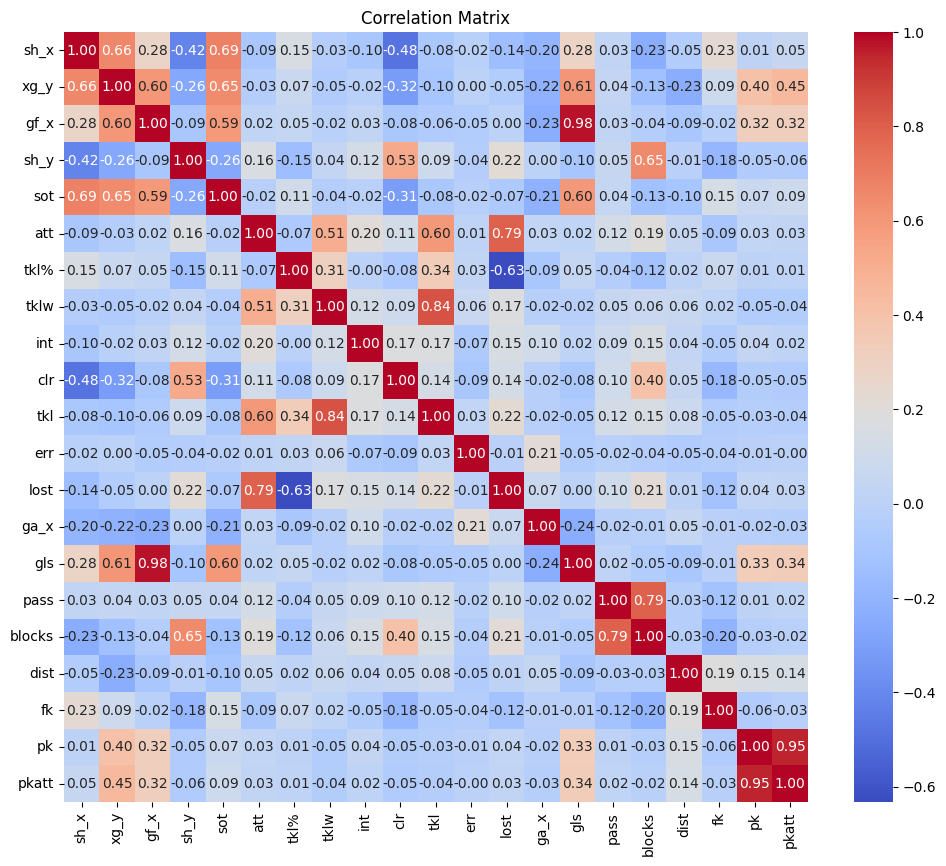

Highly correlated feature pairs (correlation > 0.8):
[('tkl', 'tklw'), ('gls', 'gf_x'), ('pkatt', 'pk')]
Features to drop due to high correlation: {'tklw', 'pk', 'gf_x'}
Remaining features: ['sh_x', 'xg_y', 'sh_y', 'sot', 'att', 'tkl%', 'int', 'clr', 'tkl', 'err', 'lost', 'ga_x', 'gls', 'pass', 'blocks', 'dist', 'fk', 'pkatt']
Updated predictors1: ['venue_code', 'opp_code', 'hour', 'day_code', 'attack_strength', 'defense_strength', 'sh_x', 'xg_y', 'sh_y', 'sot', 'att', 'tkl%', 'int', 'clr', 'tkl', 'err', 'lost', 'ga_x', 'gls', 'pass', 'blocks', 'dist', 'fk', 'pkatt']
Precision with reduced features: 0.9417


In [669]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


predictors1 = ["venue_code", "opp_code","hour", "day_code","attack_strength","defense_strength"]
# Step 1: Subset the dataset for correlation analysis
cols = ["sh_x", "xg_y", "gf_x", "sh_y", "sot", "att", "tkl%", "tklw", "int", "clr", 
        "tkl", "err", "lost", "ga_x", "gls", "pass", "blocks", "dist", "fk", "pk", "pkatt"]
correlation_data = train[cols]  # Using training data for correlation analysis

# Step 2: Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Step 3: Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Step 4: Identify highly correlated features (e.g., correlation > 0.8)
threshold = 0.8
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

print("Highly correlated feature pairs (correlation > 0.8):")
print(high_corr_pairs)

# Step 5: Remove one feature from each highly correlated pair
features_to_drop = {pair[1] for pair in high_corr_pairs}  # Keep only one feature from each pair
reduced_cols = [col for col in cols if col not in features_to_drop]

print("Features to drop due to high correlation:", features_to_drop)
print("Remaining features:", reduced_cols)

# Step 6: Update predictors1
predictors1 = predictors1 + reduced_cols
print("Updated predictors1:", predictors1)

# Step 7: Retrain the model with reduced features
lr.fit(train[predictors1], train["target"])
preds = lr.predict(test[predictors1])
reduced_error = precision_score(test["target"], preds, average='micro')

print(f"Precision with reduced features: {reduced_error:.4f}")


In [ ]:
'''

feature_importance = pd.DataFrame({
    'Feature': predictors1,
    'Importance': np.abs(lr.coef_[0])
})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(feature_importance)

# Evaluate accuracy with all features
preds = lr.predict(test[predictors1])
original_precision = precision_score(test["target"], preds, average='micro')
print(f"Precision with all features: {original_precision:.4f}")

# Iteratively remove the least important feature(s) and evaluate accuracy
low_importance_features = feature_importance.tail(3)['Feature'].values  # Adjust number if needed
X_train_reduced = train[predictors1].drop(columns=low_importance_features)
X_test_reduced = test[predictors1].drop(columns=low_importance_features)

# Refit model with reduced features
lr.fit(X_train_reduced, train["target"])
preds_reduced = lr.predict(X_test_reduced)

# Evaluate precision after removing features
reduced_precision = precision_score(test["target"], preds_reduced, average='micro')
print(f"Precision after removing low-importance features: {reduced_precision:.4f}")


from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=42, max_iter=10000)

# Initialize RFE
rfe = RFE(estimator=logreg_model, n_features_to_select=20)

# Fit RFE on data
rfe.fit(train[predictors1], train["target"])

# Get selected features
selected_features = train[predictors1].columns[rfe.support_]

print("Selected Features (Logistic Regression):", selected_features)
'''